In [5]:
import numpy as np
def generate_data():
    seed = 2
    rdm = np.random.RandomState(seed)
    X = rdm.randn(300, 2)
    Y = [[int(x_0 * x_0 + x_1 * x_1 < 2)] for (x_0, x_1) in X]
    return X, Y

In [7]:
import tensorflow as tf
def forward(x, regularizer):
    w1 = get_weight([2, 11], regularizer)
    b1 = get_bias([11])
    w2 = get_weight([11, 1], regularizer)
    b2 = get_bias([1])
    a1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    y = tf.matmul(a1, w2) + b2
    return y
def get_weight(shape, regularizer):
    w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection("losses", tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w
def get_bias(shape):
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)


LEARNING_RATE_BASE = 0.001
LEARNING_RATE_DECAY = 0.999
REGULARIZER = 0.01
BATCH_SIZE = 30
STEPS = 40000

def backword():
    X, Y = generate_data()
    
    x = tf.placeholder(tf.float32, shape=(None, 2))
    y = tf.placeholder(tf.float32, shape=(None, 1))
    
    y_hat = forward(x, REGULARIZER)
    
    loss_mes = tf.reduce_mean(tf.square(y - y_hat))
    loss_total = loss_mes + tf.add_n(tf.get_collection("losses"))
    
    global_step = tf.Variable(0, trainable=False)
    
    learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE,
                                               global_step, 
                                               300/BATCH_SIZE, 
                                               LEARNING_RATE_DECAY,
                                               staircase=True)
    
    train = tf.train.AdamOptimizer(0.0001).minimize(loss_total)
    
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(STEPS):
            start = (i * BATCH_SIZE) % 300
            end = start + BATCH_SIZE
            sess.run(train, feed_dict={x: X[start:end], y:Y[start:end]})
            if i % 4000 == 0:
                loss_value = sess.run(loss_total, feed_dict={x:X, y:Y})
                print("After %d steps, loss is %f" % (i, loss_value))
        
        xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = sess.run(y_hat, feed_dict={x: grid})
        probs = probs.reshape(xx.shape)
        
    plt.scatter(X[:,0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    plt.contour(xx, yy, probs, levels=[0.5])
    plt.show()

After 0 steps, loss is 7.258788
After 4000 steps, loss is 0.445916
After 8000 steps, loss is 0.283561
After 12000 steps, loss is 0.211750
After 16000 steps, loss is 0.172516
After 20000 steps, loss is 0.147748
After 24000 steps, loss is 0.131087
After 28000 steps, loss is 0.122077
After 32000 steps, loss is 0.116601
After 36000 steps, loss is 0.112271


D:\soft\Ana\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\soft\Ana\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


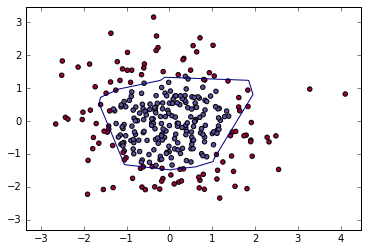

In [16]:
if __name__ == "__main__":
    backword()